# Assignment #1: Exploratory Data Analysis (EDA) on Fraud Transactions


## Objective:
Perform exploratory data analysis (EDA) using a real-world fraud dataset to uncover insights, spot anomalies, and build intuition about fraud patterns.

### What You'll Do:
- Load the dataset

- Explore the data structure and summary statistics

- Visualize fraud-related patterns using:

    - Boxplot

    - Histogram

    - Heatmap

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler


In [2]:

# Load the dataset (update path if needed)
df = pd.read_csv('creditcard.csv')

# Preview the data
print(df.head())

df.describe()

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Assignment #1: Exploratory Data Analysis on Credit Card Fraud Data

# � Objective
In this assignment, you’ll perform exploratory data analysis (EDA) on a **real-world credit card fraud dataset**. Your goal is to develop a clear understanding of the dataset’s structure, key variables, and any potential signs of fraud using summary statistics and data visualizations.

This is your first hands-on opportunity to apply Python and data science techniques to a real fraud detection problem.

-

## 📁 Dataset: [Credit Card Fraud Detection Dataset (Kaggle)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

- Transactions made by European cardholders in September 2013
- Features are PCA-transformed (`V1`–`V28`) plus `Time`, `Amount`, and `Class`
- `Class = 1` indicates a fraudulent transaction

You may already have this dataset preloaded for the assignment. If not, download it from tKaggle link ae.

---

## 🧠 Your Task

1. **Import the Dataset**
   - Load the dataset into a Pandas DataFrame
   - Use `df.head()` to preview the first few rows

2. **Summary Statistics**
   - Use `df.describe()` to examine key metrics
   - Highlight and interpret any differences between fraudulent and non-fraudulent transactions

3. **Boxplot**
   - Plot a boxplot comparing the **Amount** variable by `Class` (fraud vs. non-fraud)
   - Identify any outliers or unusual distributions

4. **Histogram**
   - Create a histogram of transaction amounts
   - Use color or grouping to compare fraud vs. non-fraud

5. **Correlation Heatmap**
   - Generate a correlation matrix of all numeric features
   - Plot it using `seaborn.heatmap()` and interpret any strong relationships

6. **Observations**
   - Provide a short summary of what you've discovered
   - Use Markdown to document: suspicious trends, high-r variables, or visual insights

---

## 💯 Grading Rubric (100 Points)

| Category                                      | Points | Details                                                                 |
|----------------------------------------------|--------|-------------------------------------------------------------------------|
| 📥 Dataset Loading & Head Output             | 10 pts | Dataset is correctly loaded and displayed                              |
| 📊 Summary Statistics (`describe`)           | 10 pts | Key metrics are shown and explained                                    |
| 📦 Boxplot of Amount by Class                | 20 pts | Boxplot created with meaningful labels and insights                    |
| 📉 Histogram with Class Overlay              | 20 pts | Histogram clearly compares fraud vs. non-fraud                         |
| 🔥 Correlation Heatmap                       | 20 pts | Accurate matrix and clear heatmap generated                            |
| 📝 Observations & Markdown Commentary        | 20 pts | Thoughtful insighoor formatting, hard-to-read, or broken code            |

> 🧮 **Total: 100 Points**

---

## 🌟 Optional Extra Credit (Up to +50 Points)

Looking to challenge yourself or build your portfolio? Choose any of the following:

| Extra Credit Task                                       | Points |
|---------------------------------------------------------|--------|
| 📈 Plot fraud rate over time using `Time` column         | +10 pts |
| 🧮 Use `groupby()` to explore fraud by amount bins       | +10 pts |
| 🔍 Create a pairplot with Seaborn for high-correlation variables | +10 pts |
| 🎻 Try violin or KDE plots to explore distributions      | +10 pts |
| 🧾 Use z-score or IQR for outlier detection              | +10 pts |

> You can earn **up to +50 extra points**, which will be added to your final score. Te tasks are optional and great for resume-worthy exploration.

---

## 🧵 Submission Guidelines

- Submit your `.ipynb` Jupyter Notebook via the course platform
- Include inline comments and Markdown explanations
- Your notebook should be clean, organized, and runnable

---

## ✅ Example Code Snippet to Get You Started

```python
import pandas as pd
import matplotlib.pyplot as plt
import seabord dataset
df = pd.read_csv("creditcard.csv")
print(df.head())

# Summary statistics
print(df.describe())


In [3]:
# Load dataset
df = pd.read_csv("creditcard.csv")
print(df.head())

# Summary statistics
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### Box plot 

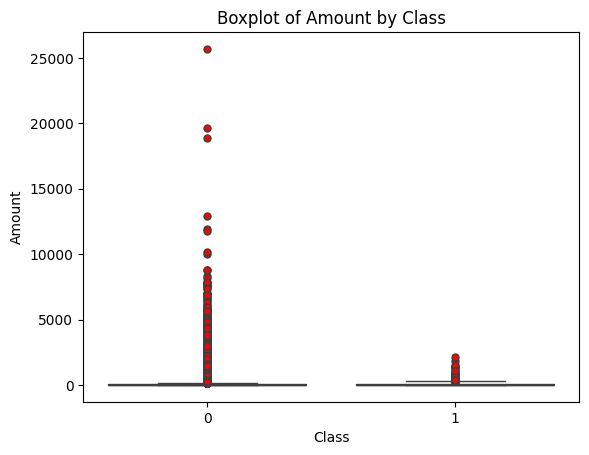

In [4]:
rel_data_box_plt = df[['Amount', 'Class']]
sns.boxplot(x='Class', y='Amount', data=rel_data_box_plt,  flierprops=dict(marker='o', markersize=5, markerfacecolor='red'))
plt.title('Boxplot of Amount by Class')
plt.show()


Looking at the boxplot above, it is clear that a lot of outliers in the dataset.

usng the IQR method, we will handle outliers 

C:\Users\asadn\AppData\Local\Temp\ipykernel_32408\3835741398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data_box_plt['amount_capped'] = rel_data_box_plt['Amount'].clip(lower=lower_bound, upper=upper_bound)


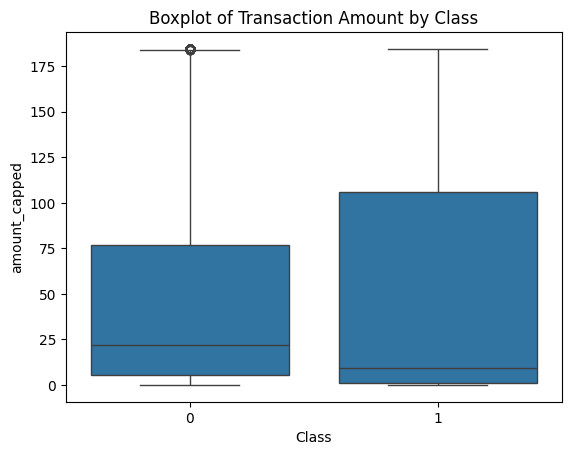

In [5]:
# Calculating IQR
Q1 = rel_data_box_plt['Amount'].quantile(0.25)
Q3 = rel_data_box_plt['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outliers
rel_data_box_plt['amount_capped'] = rel_data_box_plt['Amount'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(x='Class', y='amount_capped', data=rel_data_box_plt)
plt.title('Boxplot of Transaction Amount by Class')
plt.show()


Alternatively, we can ask seaborn to handle the outliers in the viz. 

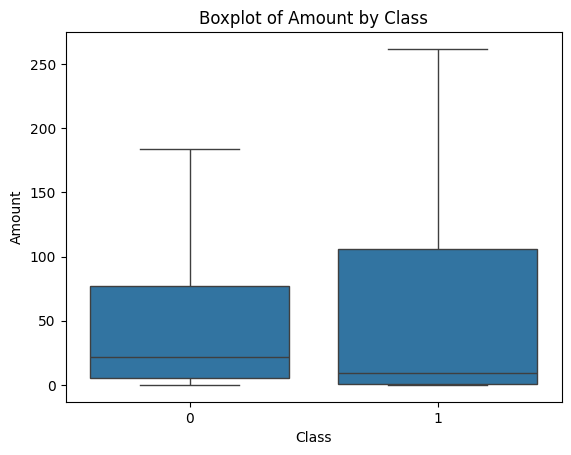

In [6]:
sns.boxplot(x='Class', y='Amount', data=rel_data_box_plt,  showfliers=False)
plt.title('Boxplot of Amount by Class')
plt.show()

Let's also analyse the outliers

In [7]:
df_upper_outliers = df[df['Amount'] > upper_bound]

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df_upper_outliers.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,...,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000,31904.000000
mean,93445.400577,-0.749136,-1.826656,-0.481082,0.150851,-0.924023,0.469958,0.664025,-0.197042,-0.069211,...,0.147098,-0.021202,-0.052610,-0.015711,-0.018238,0.014994,-0.017742,0.012424,511.451107,0.002852
std,46610.745893,2.711336,2.705821,1.763267,1.571823,2.085506,1.709598,2.147656,1.442404,1.224645,...,0.922651,0.811301,1.409049,0.628641,0.631046,0.575648,0.601740,0.640746,585.479806,0.053332
min,1.000000,-56.407510,-72.715728,-48.325589,-5.024097,-113.743307,-26.160506,-31.764946,-73.216718,-8.507059,...,-34.830382,-10.933144,-44.807735,-2.814898,-10.295397,-2.604551,-22.565679,-15.430084,184.520000,0.000000
25%,51740.000000,-1.610532,-2.279354,-1.374749,-0.833060,-1.610851,-0.452540,-0.349535,-0.337686,-0.892581,...,-0.083296,-0.518318,-0.406800,-0.349104,-0.349459,-0.370895,-0.139641,-0.030272,239.642500,0.000000
50%,81818.000000,-0.248178,-1.391178,-0.237457,0.028011,-0.916981,0.184894,0.378964,-0.042436,-0.117052,...,0.159542,0.011841,-0.136387,0.047755,0.043041,-0.120582,-0.049138,0.044239,334.000000,0.000000
75%,137401.250000,0.865720,-0.648524,0.688060,0.969548,-0.111965,1.070208,1.286175,0.266500,0.735430,...,0.410957,0.527271,0.302822,0.442969,0.363287,0.380033,0.038523,0.105949,550.785000,0.000000
max,172792.000000,2.070285,12.793880,9.382558,16.875344,34.801666,73.301626,120.589494,9.643419,15.594995,...,16.223696,10.503090,22.528412,4.584549,5.852484,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
df_lower_outliers = df[df['Amount'] < lower_bound]

In [11]:
df_lower_outliers.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before we move to histogram of Amount Bins, lets look at the data from a groupby data

In [12]:
df.groupby(['Class']).agg(mean_transaction=pd.NamedAgg('Amount', 'mean'), min_transaction=pd.NamedAgg('Amount', 'min'), max_transaction=pd.NamedAgg('Amount', 'max'), median_transaction=pd.NamedAgg('Amount', 'median'))

,mean_transaction,min_transaction,max_transaction,median_transaction
Class,,,,
0,88.291022,0.0,25691.16,22.00
1,122.211321,0.0,2125.87,9.25


## Histogram

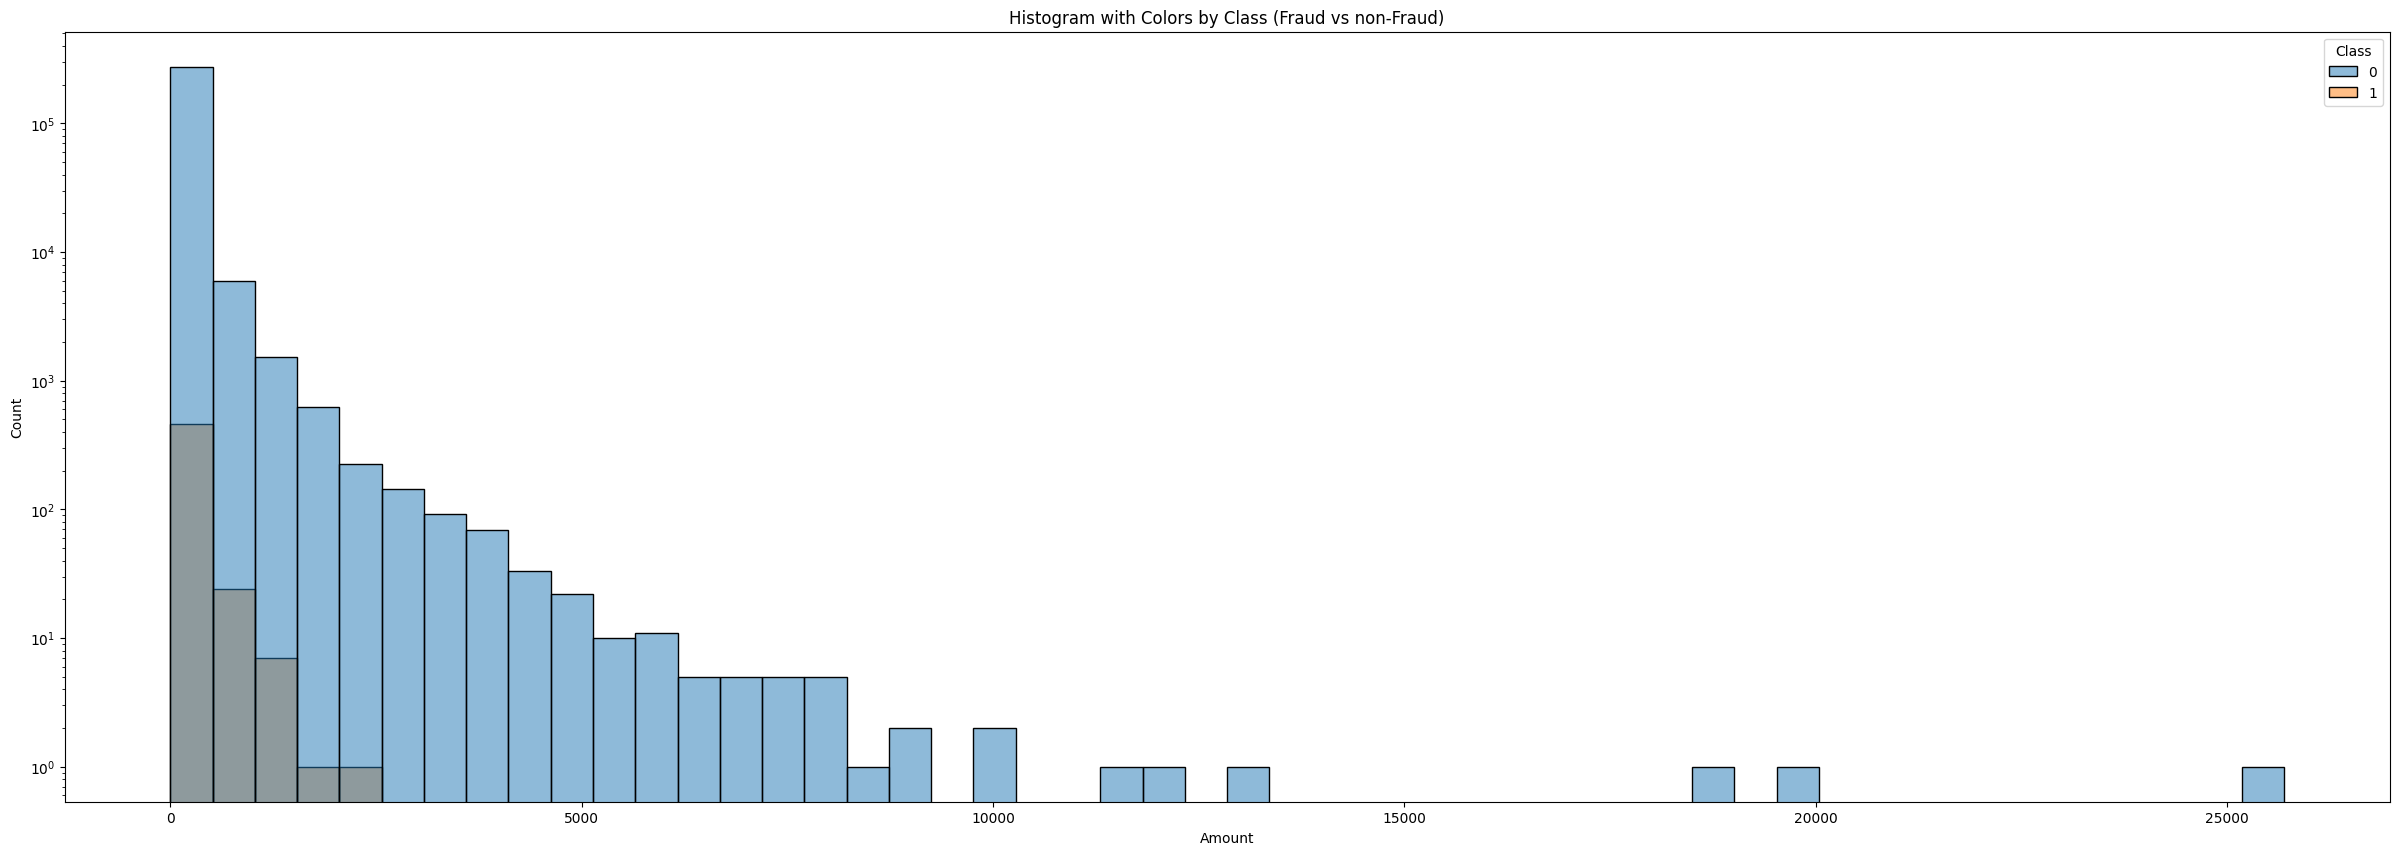

In [13]:
plt.figure(figsize = (30,10))
sns.histplot(data=rel_data_box_plt, x='Amount',bins=50
             ,hue='Class', multiple='layer', alpha=0.5)

plt.title('Histogram with Colors by Class (Fraud vs non-Fraud)')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.yscale('log')
plt.show()


### Correlation Heatmap

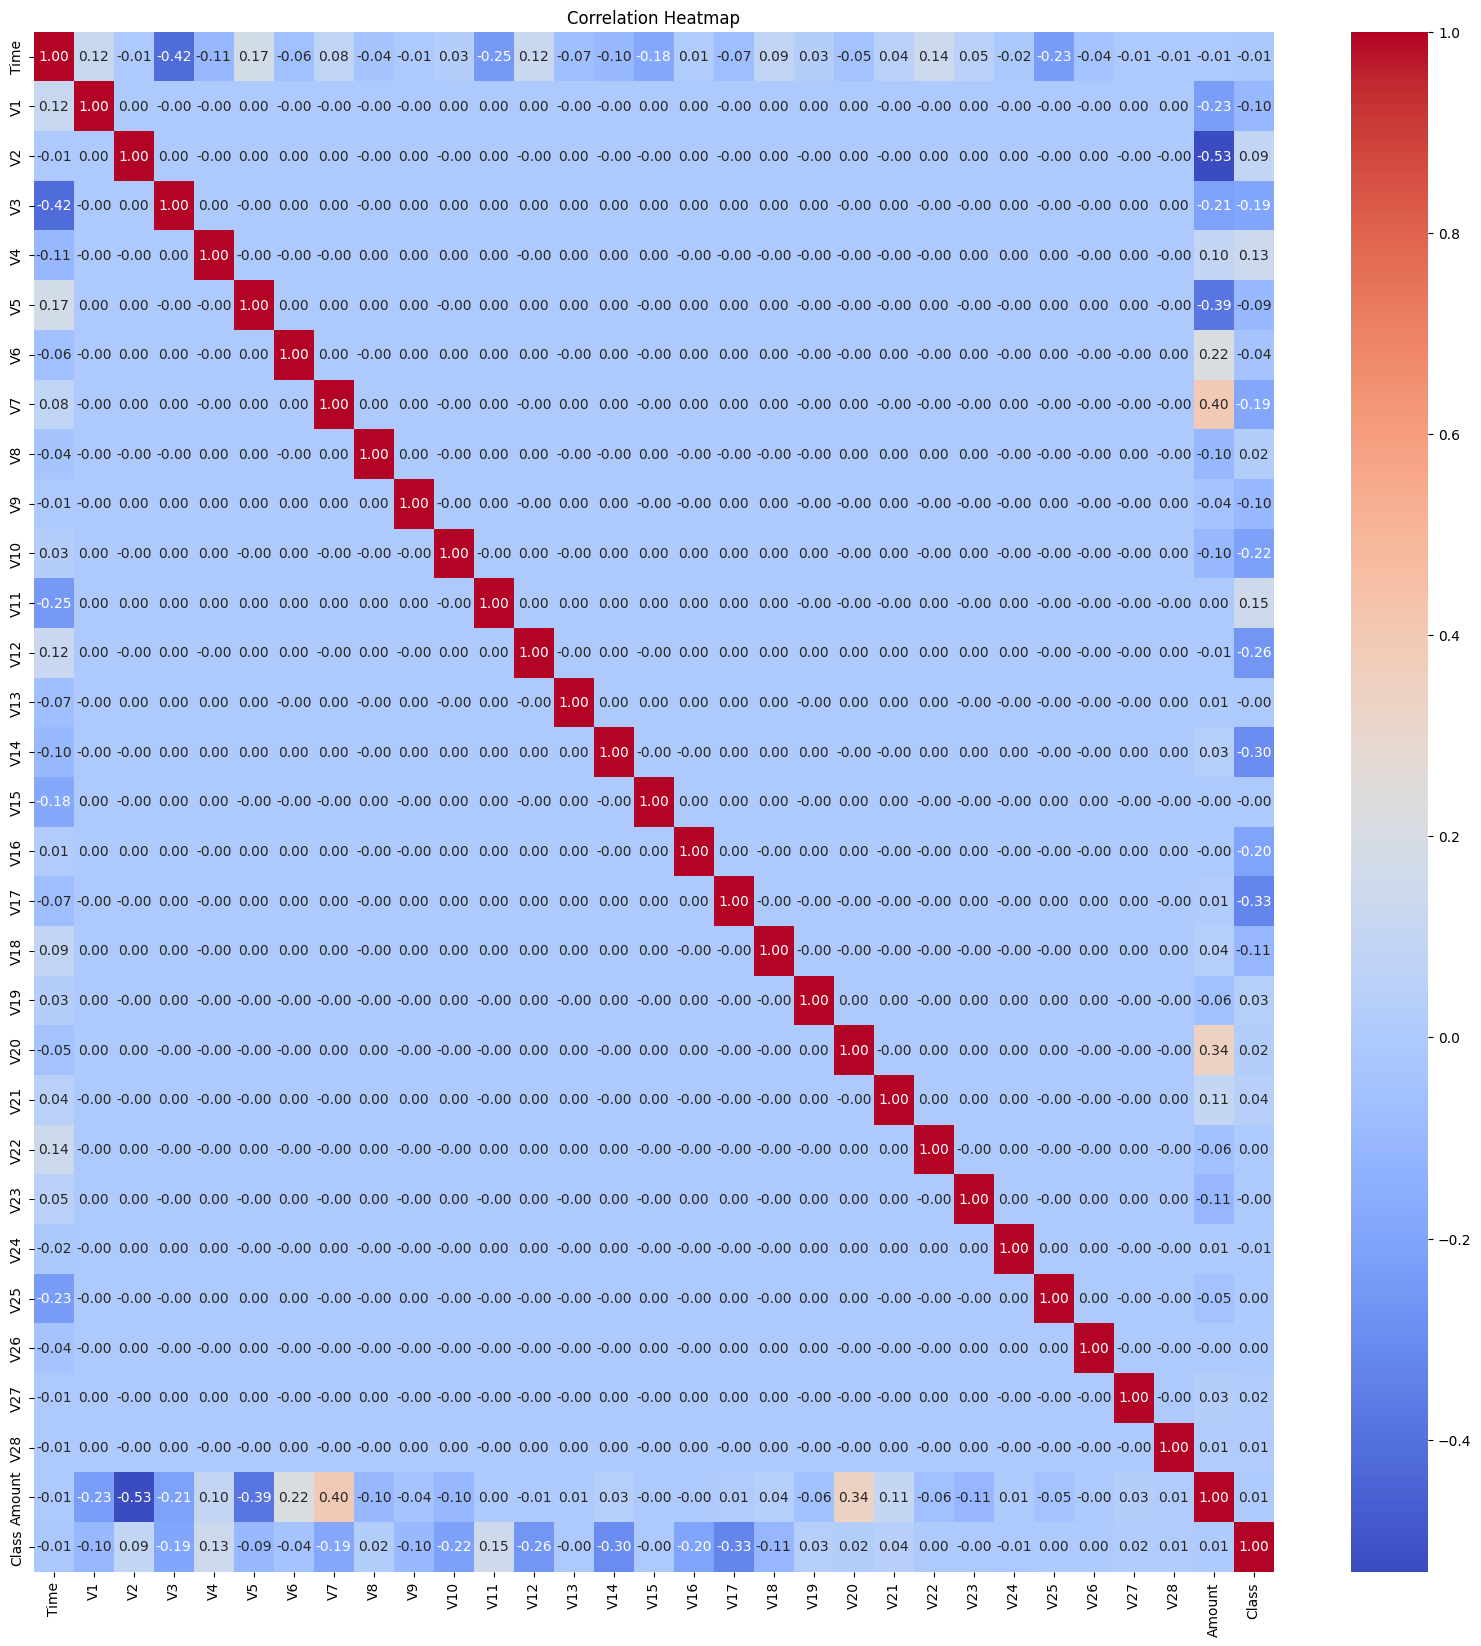

In [14]:
plt.figure(figsize = (20,20))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



Based on the above heatmap, V7 and V20 have postive correlation with amount. While V2 and V5 has negative correlation with Amount.

### Mutual Information


In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = df.copy().pop("Amount")



In [17]:
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)


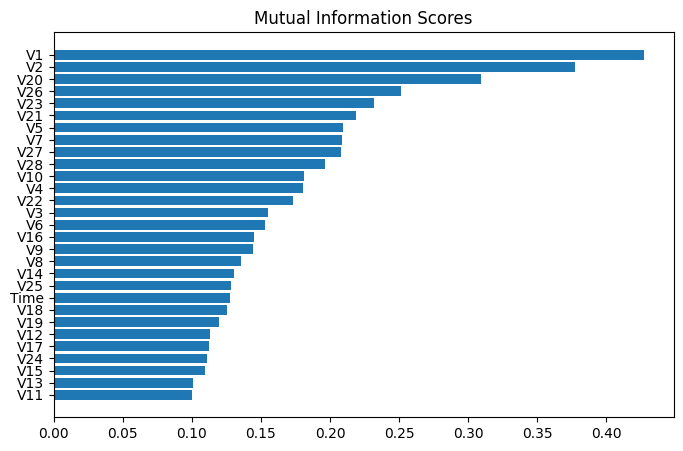

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_series)


In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
